In [3]:
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.decomposition import PCA


data = pd.read_csv('total_data_na.csv')
data.head()

new = data.drop('PLAYER', axis=1)
new = new.replace('-', np.nan)


# # Select relevant features for clustering
# features = data[['Runs.x', 'HS', 'Avg.x', 'BF', 'SR.x', 'X100', 'X50', 'Runs.y', 'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y']]

# features = features.replace('-', np.nan)
# # Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
# features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)
new = pd.DataFrame(imputer.fit_transform(new), columns=new.columns)


# select features using pca

pca = PCA(n_components= 2, random_state= 42)
features_scaled = pca.fit_transform(new)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_scaled)

kmeans = KMeans(n_clusters = 3, random_state= 42, n_init= 100, max_iter=100000)


kmeans.fit(features_scaled)

centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)


labels = kmeans.labels_

print("\nLabels:")
print(labels)

data['Cluster'] = labels
# Create the balanced cricket team
top_order_batsmen = data[data['Cluster'].isin([0])]
middle_order_batsmen = data[data['Cluster'].isin([0,1])]
all_rounders = data[data['Cluster'].isin([1])]
bowlers = data[data['Cluster'].isin([2])]

# # Select the top players based on the criteria for each role
# top_order_batsmen = top_order_batsmen.nlargest(2, ['Runs.x', 'Avg.x'])
# middle_order_batsmen = middle_order_batsmen.nlargest(3, ['Avg.x'])
# all_rounders = all_rounders.nlargest(3, ['Runs.x', 'Wkts', 'BBI'])
# bowlers = bowlers.nlargest(4, ['Wkts', 'BBI'])

# # Convert 'Avg.x' column to numeric data type
# top_order_batsmen['Avg.x'] = pd.to_numeric(top_order_batsmen['Avg.x'], errors='coerce')
# middle_order_batsmen['Avg.x'] = pd.to_numeric(middle_order_batsmen['Avg.x'], errors='coerce')
# all_rounders['Avg.x'] = pd.to_numeric(all_rounders['Avg.x'], errors='coerce')
# bowlers['Avg.y'] = pd.to_numeric(bowlers['Avg.y'], errors='coerce')

# Select the top players based on the criteria for each role
top_order_batsmen = top_order_batsmen.nlargest(2, ['Runs.x'])
middle_order_batsmen = middle_order_batsmen.nlargest(3, [ 'Runs.x'])
all_rounders = all_rounders.nlargest(3, ['Runs.x', 'Wkts', 'BBI'])
bowlers = bowlers.nlargest(4, ['Wkts'])

# # Combine all the players to form a team
# team = pd.concat([top_order_batsmen, middle_order_batsmen, all_rounders, bowlers])

# # Print the selected team
# print(team)

# # Select the top players based on the criteria for each role
# top_order_batsmen = top_order_batsmen.nlargest(3, ['Runs.x'])
# #Middle-order batsmen (batsmen who typically bat at positions 3 to 6),
# middle_order_batsmen = middle_order_batsmen.nlargest(2, ['Runs.x'] )
# all_rounders = all_rounders.nlargest(3, ['Runs.x', 'Wkts', 'BBI'])
# bowlers = bowlers.nlargest(4, ['Wkts', 'BBI'])

# # Create the balanced cricket team
print("Top order batsmen:")
print(top_order_batsmen)
print("\nMiddle order batsmen:")
print(middle_order_batsmen)
print("\nAll-rounders:")
print(all_rounders)
print("\nBowlers:")
print(bowlers)


Centroids:
[[-0.26609599 -0.68043073]
 [-0.69299169  1.29936631]
 [ 1.80493738  0.24453481]]

Labels:
[0 2 0 2 0 2 1 1 1 0 1 1 0 0 2 2 0 0 0 0 0 0 0 0 1 0 2 1 2 0 0 0 1 1 0 0 2
 0 1 1 2 0 2 2 0 0 1 1 2 0 0 0 2 0 0 0 1 0 0 0 1 2 2 0 1 0 0 0 0 1 1 1 0 2
 2 2 0 2 0 1 2 1 2 1 0 1 2 0 0 1 2 2 1 0 0 2 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1]
Top order batsmen:
           PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
51  Mandeep Singh     14      13   3     252  47   25.2  186  135.48     0   
65   Prithvi Shaw      9       9   0     245  65  27.22  160  153.12     0   

    ...  Runs.y  Wkts  BBI  Avg.y  Econ  SR.y  X4w  X5w  y Cluster  
51  ...       0     0    0      0   0.0     0    0    0  0       0  
65  ...       0     0    0      0   0.0     0    0    0  0       0  

[2 rows x 26 columns]

Middle order batsmen:
           PLAYER  Mat.x  Inns.x  NO  Runs.x  HS  Avg.x   BF    SR.x  X100  \
89    Sunil 0rine     

Silhouette Score for 2 clusters: 0.4216399565665846
Silhouette Score for 3 clusters: 0.5273720206167789
Silhouette Score for 4 clusters: 0.4629959681206261
Silhouette Score for 5 clusters: 0.46475675243425935
Silhouette Score for 6 clusters: 0.468419996078219
Silhouette Score for 7 clusters: 0.44694863212476654
Silhouette Score for 8 clusters: 0.42590992401102074
Silhouette Score for 9 clusters: 0.4340163093693537
Silhouette Score for 10 clusters: 0.4377549118363615
Silhouette Score for 11 clusters: 0.4270236645031948
Silhouette Score for 12 clusters: 0.45320364409465863
Silhouette Score for 13 clusters: 0.4518071788550678
Silhouette Score for 14 clusters: 0.4606529239051934
Silhouette Score for 15 clusters: 0.4565230829131345
Silhouette Score for 16 clusters: 0.4375136849948915
Silhouette Score for 17 clusters: 0.45696206051362087
Silhouette Score for 18 clusters: 0.4454196562911263
Silhouette Score for 19 clusters: 0.4510322223182512


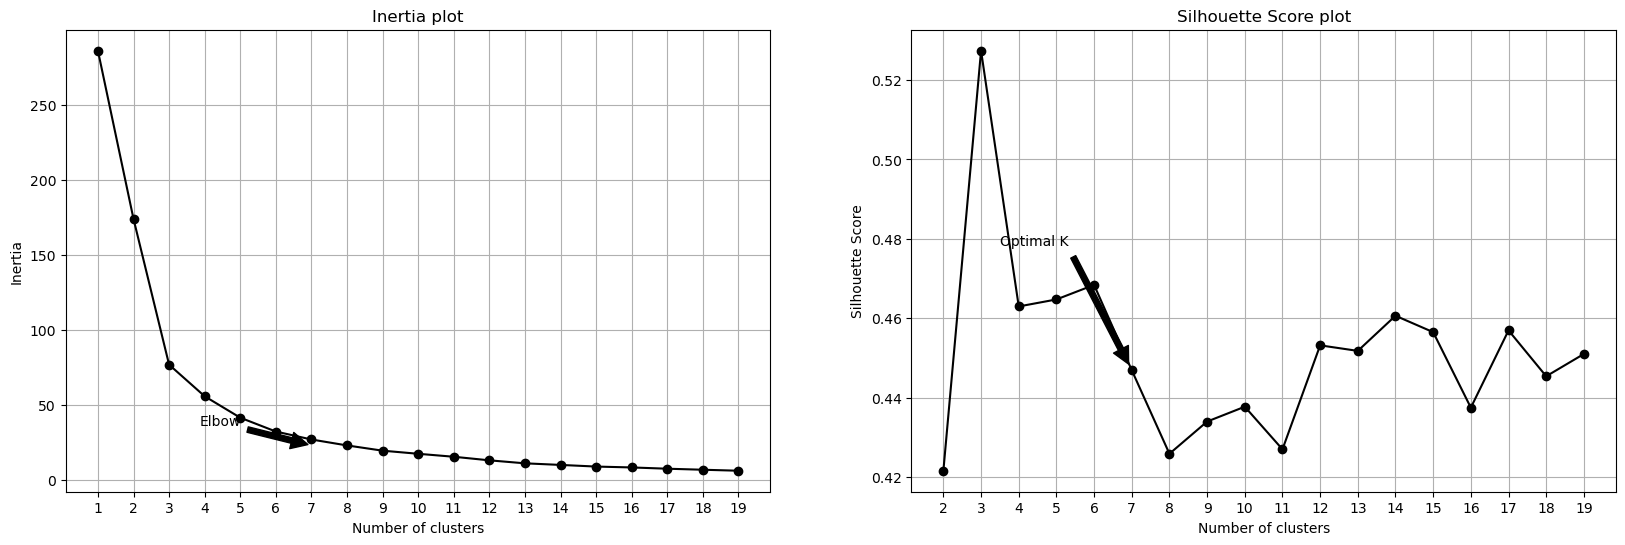

In [4]:


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
sse = []
for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=1000)
  kmeans.fit(features_scaled)
  sse.append(kmeans.inertia_)
# Calculate silhouette scores for different K
sil_scores = []
for k in range(2, 20):  # silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=1000)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    sil_scores.append(score)

for k in range(2, 20):
    print(f'Silhouette Score for {k} clusters: {sil_scores[k-2]}')
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))




# Elbow method plot
number_clusters = range(1, 20)
ax1.plot(number_clusters, sse, marker='o', color='black')
ax1.grid(True)
ax1.set_xticks(number_clusters)
ax1.annotate('Elbow', xy=(7, sse[7]), xytext=(0.1, 0.2), textcoords='figure fraction', arrowprops=dict(facecolor='black', shrink=0.05))
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Inertia plot')

# Silhouette method plot
ax2.plot(range(2, 20), sil_scores, marker='o', color='black')
ax2.grid(True)
ax2.set_xticks(range(2, 20))
ax2.annotate('Optimal K', xy=(7, sil_scores[5]), xytext=(0.5, 0.5), textcoords='figure fraction', arrowprops=dict(facecolor='black', shrink=0.05))
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score plot')

plt.show()

